Taller 1:

Estudiante: Damián Rosero Vinueza

Descargamos las librerías iniciales para crear los datos con Faker, Pandas para trabajar con los datos y numpy para las operaciones matemáticas

In [1]:
!pip install Faker pandas numpy

  Using cached faker-37.1.0-py3-none-any.whl.metadata (15 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.5-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached faker-37.1.0-py3-none-any.whl (1.9 MB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached numpy-2.2.5-cp312-cp312-win_amd64.whl (12.6 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/5 [pytz]
   ---------------------------------------- 0/5 [pytz]
   -------- ------------------------------- 1/5 [tzdata]
   -------- ------------------------------- 1/5 [tzdata]
   ---------------- ----------------------- 2/5 [numpy]
   ---------------- ----------------------- 2/5 [numpy]
   ---------------- --------------------

Importamos las librerías

In [1]:
import pandas as pd
import numpy as np
from faker import Faker
import random

Creamos 1000 registros para el dataset

In [2]:
num_registros = 1000

Generamos una lista con los tipos de productos que va a tener el dataset

In [3]:
productos_lista = ['Laptop', 'Teclado', 'Mouse', 'Monitor', 'Webcam', 'Microfono', 'Impresora', 'Router', 'Disco Duro', 'USB', 'Auriculares', 'Altavoces']

Generamos un diccionario con los ´precios de los productos

In [5]:
precios_lista = {
    'Laptop': 1200, 'Teclado': 75, 'Mouse': 25, 'Monitor': 300, 'Webcam': 50,
    'Microfono': 80, 'Impresora': 250, 'Router': 100, 'Disco Duro': 150,
    'USB': 15, 'Auriculares': 60, 'Altavoces': 120
}

Generamos una lista de regiones en donde se va a realizar las ventas

In [6]:
regiones_lista = ['Norte', 'Sur', 'Este', 'Oeste', 'Centro', 'Noroeste', 'Sureste']

Generamos la estructura del Dataframe

In [8]:
data = {
    'ID_Venta': [],
    'Producto': [],
    'Cantidad': [],
    'Precio': [],
    'Fecha_Venta': [],
    'Region': []
}


Creamos los datos par el dataset

In [9]:
fake = Faker()

In [10]:
for i in range(num_registros):
    producto = random.choice(productos_lista)
    precio = precios_lista[producto]
        # Asegurarse de que el precio no sea negativo
    precio = max(1.0, precio)

    data['ID_Venta'].append(i + 1)
    data['Producto'].append(producto)
    data['Cantidad'].append(random.randint(1, 10)) # Cantidad entre 1 y 10
    data['Precio'].append(precio)
    data['Fecha_Venta'].append(fake.date_between(start_date='-365d', end_date='today').strftime('%Y-%m-%d'))
    data['Region'].append(random.choice(regiones_lista))

df = pd.DataFrame(data)
df.to_csv('datos_ventas.csv', index=False)


Leemos el dataset creado del archivo .csv

In [11]:
#import pandas as pd
df_ventas = pd.read_csv('datos_ventas.csv', parse_dates=['Fecha_Venta'])

Lectura de las cabeceras del dataframe

In [12]:
print(df_ventas.head())


   ID_Venta     Producto  Cantidad  Precio Fecha_Venta   Region
0         1      Teclado         8      75  2024-07-22  Sureste
1         2       Router         4     100  2024-07-10    Norte
2         3    Microfono         6      80  2025-01-17  Sureste
3         4    Impresora         4     250  2025-01-17     Este
4         5  Auriculares         9      60  2024-09-15  Sureste


Verificación de los tipos de datos

In [13]:
print(df_ventas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID_Venta     1000 non-null   int64         
 1   Producto     1000 non-null   object        
 2   Cantidad     1000 non-null   int64         
 3   Precio       1000 non-null   int64         
 4   Fecha_Venta  1000 non-null   datetime64[ns]
 5   Region       1000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 47.0+ KB
None


In [ ]:
Agregamos cuatro columnas al dataframe

In [14]:
# Columna con el valor total de la venta realizada
df_ventas['Total_Venta'] = df_ventas['Cantidad'] * df_ventas['Precio']
# Columna adicional solo con el año
df_ventas['Año_Venta'] = df_ventas['Fecha_Venta'].dt.year
# Columna adicional solo con el mes
df_ventas['Mes_Venta'] = df_ventas['Fecha_Venta'].dt.month
# Día de la semana de venta
df_ventas['Dia_Semana_Venta'] = df_ventas['Fecha_Venta'].dt.day_name() 
#Verificamos si la venta se realizó el fin de semana
df_ventas['Es_Fin_Semana'] = df_ventas['Fecha_Venta'].dt.day_name().isin(['Saturday', 'Sunday'])

print("\nDataFrame con nuevas columnas:")
print(df_ventas.head())


DataFrame con nuevas columnas:
   ID_Venta     Producto  Cantidad  Precio Fecha_Venta   Region  Total_Venta  \
0         1      Teclado         8      75  2024-07-22  Sureste          600   
1         2       Router         4     100  2024-07-10    Norte          400   
2         3    Microfono         6      80  2025-01-17  Sureste          480   
3         4    Impresora         4     250  2025-01-17     Este         1000   
4         5  Auriculares         9      60  2024-09-15  Sureste          540   

   Año_Venta  Mes_Venta Dia_Semana_Venta  Es_Fin_Semana  
0       2024          7           Monday          False  
1       2024          7        Wednesday          False  
2       2025          1           Friday          False  
3       2025          1           Friday          False  
4       2024          9           Sunday           True  


In [15]:

df_ventas.to_csv('datos_ventas4.csv', index=False)

In [ ]:
VISUALIZACIÓN

In [16]:
!pip install matplotlib seaborn

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


Visualización 1: Total de Ventas por Región 

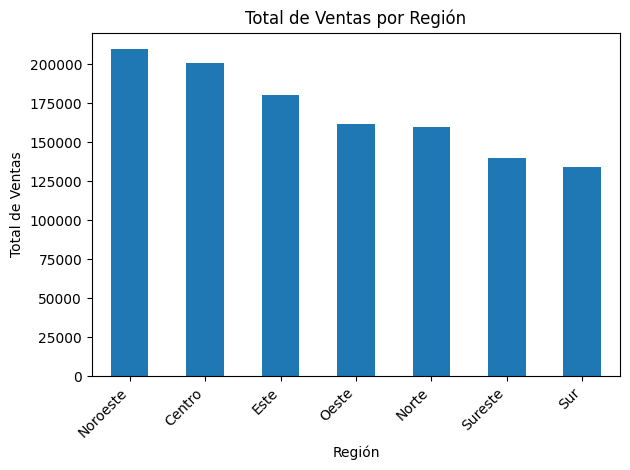

In [18]:
ventas_por_region = df_ventas.groupby('Region')['Total_Venta'].sum().sort_values(ascending=False)
ventas_por_region.plot(kind='bar')
plt.title('Total de Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() # Ajustar diseño para que las etiquetas no se corten
plt.show()


Visualización 2: Distribución del Total de Venta (Histograma)

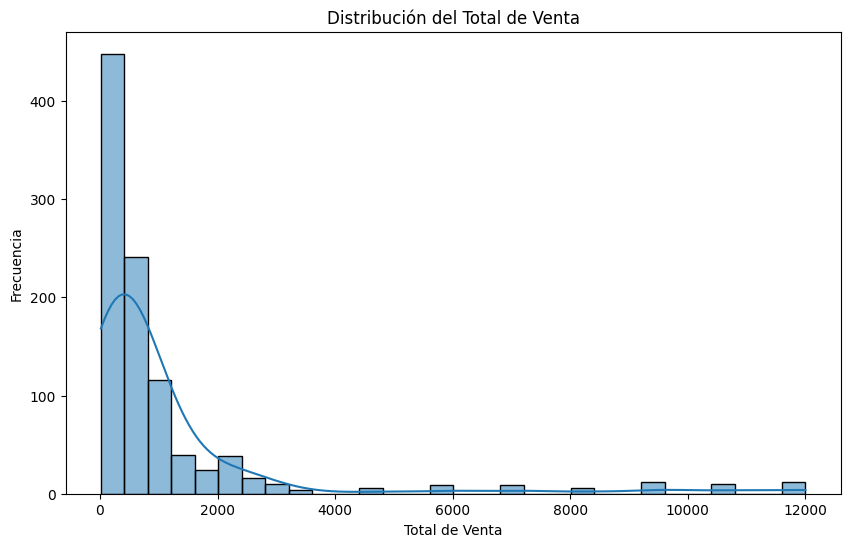

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_ventas['Total_Venta'], kde=True, bins=30) # kde=True añade una curva de densidad
plt.title('Distribución del Total de Venta')
plt.xlabel('Total de Venta')
plt.ylabel('Frecuencia')
plt.show() 

Visualización 3  Ventas promedio por Día de la Semana

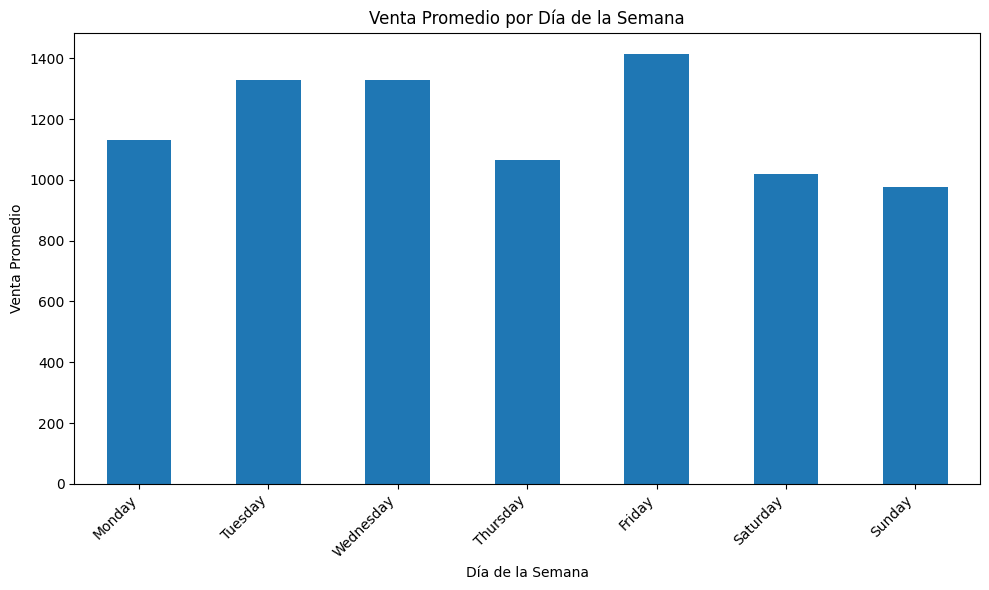

In [22]:
plt.figure(figsize=(10, 6))
ventas_por_dia_semana = df_ventas.groupby('Dia_Semana_Venta')['Total_Venta'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) # Ordenar días
ventas_por_dia_semana.plot(kind='bar')
plt.title('Venta Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Venta Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
!pip install nbconvert
